# Visualize the 6 channels of a single EGFR KOs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Using the RGB_MAP from rxrx code
RGB_MAP = {
    1: {
        'rgb': np.array([19, 0, 249]),
        'range': [0, 51]
    },
    2: {
        'rgb': np.array([42, 255, 31]),
        'range': [0, 107]
    },
    3: {
        'rgb': np.array([255, 0, 25]),
        'range': [0, 64]
    },
    4: {
        'rgb': np.array([45, 255, 252]),
        'range': [0, 191]
    },
    5: {
        'rgb': np.array([250, 0, 253]),
        'range': [0, 89]
    },
    6: {
        'rgb': np.array([254, 255, 40]),
        'range': [0, 191]
    }
}

def load_image(image_path):
    """Load a single channel image."""
    return np.array(Image.open(image_path))

def normalize_to_8bit(image):
    """Normalize a 32-bit image to 8-bit."""
    image_8bit = np.array(image, dtype=np.float32)
    image_8bit = (image_8bit - image_8bit.min()) / (image_8bit.max() - image_8bit.min()) * 255
    return image_8bit.astype(np.uint8)

def convert_tensor_to_rgb(t, channels=[1, 2, 3, 4, 5, 6], vmax=255, rgb_map=RGB_MAP):
    """Converts and returns the image data as RGB image, following rxrx approach."""
    colored_channels = []
    for i, channel in enumerate(channels):
        x = (t[:, :, i] / vmax) / \
            ((rgb_map[channel]['range'][1] - rgb_map[channel]['range'][0]) / 255) + \
            rgb_map[channel]['range'][0] / 255
        x = np.where(x > 1., 1., x)
        x_rgb = np.array(
            np.outer(x, rgb_map[channel]['rgb']).reshape(t.shape[0], t.shape[1], 3),
            dtype=int)
        colored_channels.append(x_rgb)
    im = np.array(np.array(colored_channels).sum(axis=0), dtype=int)
    im = np.where(im > 255, 255, im)
    return im

def visualize_rgb_from_rxrx_with_normalized(image_files):
    """Visualize the composite image using rxrx logic."""
    normalized_images = [normalize_to_8bit(Image.open(image_file)) for image_file in image_files]
    tensor = np.stack(normalized_images, axis=-1)  # Stack the 6 channels into a tensor
    rgb_image = convert_tensor_to_rgb(tensor)      # Use the rxrx-style conversion
    plt.imshow(rgb_image)
    plt.title('RGB Composite Image with Normalized Channels')
    plt.axis('off')
    plt.show()

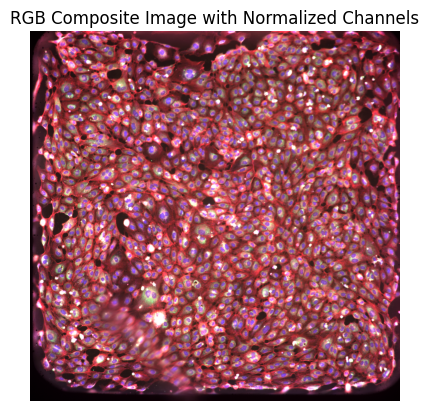

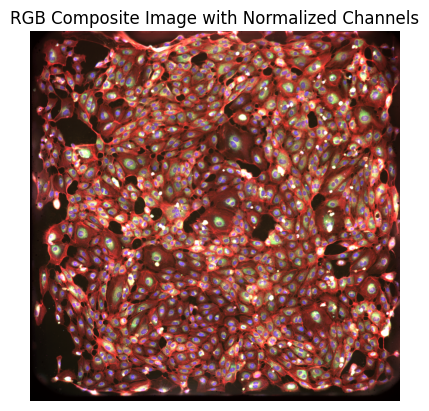

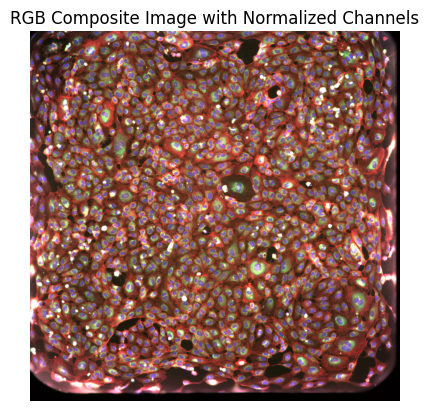

In [2]:
# Paths to the uploaded files
ADDRESS = 'AA30'

def get_image_files_for_address(image_dir, address):
    image_files = [
        f'{image_dir}/{address}_s1_w1.png',  # replace with actual paths to the images
        f'{image_dir}/{address}_s1_w2.png',
        f'{image_dir}/{address}_s1_w3.png',
        f'{image_dir}/{address}_s1_w4.png',
        f'{image_dir}/{address}_s1_w5.png',
        f'{image_dir}/{address}_s1_w6.png'
    ]
    return image_files

# Run the visualization
visualize_rgb_from_rxrx_with_normalized(get_image_files_for_address(image_dir='gene-081_EGFR', address='AA16'))
visualize_rgb_from_rxrx_with_normalized(get_image_files_for_address(image_dir='gene-081_EGFR', address='AA30'))
visualize_rgb_from_rxrx_with_normalized(get_image_files_for_address(image_dir='gene-081_EMPTY_control', address='AA03'))

In [9]:
def save_composite_image(image_files, save_path):
    """Create and save the composite RGB image."""
    # Load and normalize images
    normalized_images = [normalize_to_8bit(Image.open(image_file)) for image_file in image_files]
    
    # Create the composite image
    tensor = np.stack(normalized_images, axis=-1)
    rgb_composite = convert_tensor_to_rgb(tensor)
    
    # Ensure the composite image is in uint8 format
    rgb_composite_uint8 = np.clip(rgb_composite, 0, 255).astype(np.uint8)
    
    # Save the composite image directly
    plt.imsave(save_path, rgb_composite_uint8)

# save_composite_image(get_image_files_for_address(image_dir='gene-081_EMPTY_control', address='AA03'), save_path='AA03-composite.png')

In [6]:
import os
srcs = os.listdir('gene-081_EGFR')
addresses = [src.split('_')[0] for src in srcs]
addresses = set(addresses)


In [7]:
addresses[0]

TypeError: 'set' object is not subscriptable

In [10]:

for address in addresses:
    save_composite_image(get_image_files_for_address(image_dir='gene-081_EGFR', address=address), save_path=f'gene-081_EGFR_composite/{address}-composite.png')

In [11]:
!aws s3 sync gene-081_EGFR_composite s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_composite

upload: gene-081_EGFR_composite/AC34-composite.png to s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_composite/AC34-composite.png
upload: gene-081_EGFR_composite/AC19-composite.png to s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_composite/AC19-composite.png
upload: gene-081_EGFR_composite/AA30-composite.png to s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_composite/AA30-composite.png
upload: gene-081_EGFR_composite/AC22-composite.png to s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_composite/AC22-composite.png
upload: gene-081_EGFR_composite/AA16-composite.png to s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_composite/AA16-composite.png
upload: gene-081_EGFR_composite/AC28-composite.png to s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_composite/AC28-composite.png
upload: gene-081_EGFR_composite/AD02-composite.png to s3://cell-segmentation-data-a05c1c99b4410510/data/gene-081_EGFR_